# Chukwudi Supermarket Sales Predition

### 1. Importing the libraries

In [1]:
import os, math
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from matplotlib import pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation, tree, linear_model
from sklearn.model_selection import train_test_split
%matplotlib inline

/home/clone/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/home/clone/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### 2. Importing the dataset(train and test file ) using pandas library

In [2]:
df = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')
ID = test['Product_Supermarket_Identifier']
df.shape, test.shape

((4990, 13), (3532, 12))

####   The train file has the total of 4990 rows and 13 columns
####   The test file has the total of 3532 rows and 12 columns

In [3]:
df.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,DRA12,CHUKWUDI010,DRA12_CHUKWUDI010,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,CHUKWUDI013,DRA12_CHUKWUDI013,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,CHUKWUDI017,DRA12_CHUKWUDI017,11.6,Low Fat,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,DRA12,CHUKWUDI018,DRA12_CHUKWUDI018,11.6,Low Fat,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,CHUKWUDI035,DRA12_CHUKWUDI035,11.6,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [4]:
test.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type
0,DRA59,CHUKWUDI010,DRA59_CHUKWUDI010,8.270,Normal Fat,0.214125,Soft Drinks,459.98,2005,NaN,Cluster 3,Grocery Store
1,DRA59,CHUKWUDI013,DRA59_CHUKWUDI013,8.270,Normal Fat,0.127821,Soft Drinks,464.98,1994,High,Cluster 3,Supermarket Type1
2,DRB01,CHUKWUDI013,DRB01_CHUKWUDI013,7.390,Low Fat,0.082171,Soft Drinks,477.38,1994,High,Cluster 3,Supermarket Type1
3,DRB13,CHUKWUDI010,DRB13_CHUKWUDI010,6.115,Normal Fat,0.011791,Soft Drinks,472.63,2005,NaN,Cluster 3,Grocery Store
4,DRB13,CHUKWUDI013,DRB13_CHUKWUDI013,6.115,Normal Fat,0.007038,Soft Drinks,473.13,1994,High,Cluster 3,Supermarket Type1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 13 columns):
Product_Identifier                4990 non-null object
Supermarket_Identifier            4990 non-null object
Product_Supermarket_Identifier    4990 non-null object
Product_Weight                    4188 non-null float64
Product_Fat_Content               4990 non-null object
Product_Shelf_Visibility          4990 non-null float64
Product_Type                      4990 non-null object
Product_Price                     4990 non-null float64
Supermarket_Opening_Year          4990 non-null int64
Supermarket _Size                 3540 non-null object
Supermarket_Location_Type         4990 non-null object
Supermarket_Type                  4990 non-null object
Product_Supermarket_Sales         4990 non-null float64
dtypes: float64(4), int64(1), object(8)
memory usage: 506.9+ KB


#### the train file file has columns with 4 float64, 1 int64 and 8 object datatypes.

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3532 entries, 0 to 3531
Data columns (total 12 columns):
Product_Identifier                3532 non-null object
Supermarket_Identifier            3532 non-null object
Product_Supermarket_Identifier    3532 non-null object
Product_Weight                    2871 non-null float64
Product_Fat_Content               3532 non-null object
Product_Shelf_Visibility          3532 non-null float64
Product_Type                      3532 non-null object
Product_Price                     3532 non-null float64
Supermarket_Opening_Year          3532 non-null int64
Supermarket _Size                 2573 non-null object
Supermarket_Location_Type         3532 non-null object
Supermarket_Type                  3532 non-null object
dtypes: float64(3), int64(1), object(8)
memory usage: 331.2+ KB


#### the test file file has columns with 3 float64, 1 int64 and 8 object datatypes.

In [7]:
df.describe()

,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Product_Supermarket_Sales
count,4188.000000,4990.000000,4990.000000,4990.000000,4990.000000
mean,12.908838,0.066916,391.803796,2004.783567,6103.520164
std,4.703256,0.053058,119.378259,8.283151,4447.333835
min,4.555000,0.000000,78.730000,1992.000000,83.230000
25%,8.767500,0.027273,307.890000,1994.000000,2757.660000
50%,12.600000,0.053564,393.860000,2006.000000,5374.675000
75%,17.100000,0.095358,465.067500,2011.000000,8522.240000
max,21.350000,0.328391,667.220000,2016.000000,32717.410000


In [8]:
test.describe()

,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year
count,2871.000000,3532.000000,3532.000000,3532.000000
mean,12.781665,0.065030,296.903392,2004.900057
std,4.554868,0.049454,181.897221,8.497250
min,4.555000,0.000000,78.230000,1992.000000
25%,8.840000,0.026811,145.307500,1994.000000
50%,12.600000,0.054444,237.770000,2006.000000
75%,16.600000,0.094049,461.002500,2011.000000
max,21.350000,0.321115,667.220000,2016.000000


In [9]:
df.isnull().sum()

Product_Identifier                   0
Supermarket_Identifier               0
Product_Supermarket_Identifier       0
Product_Weight                     802
Product_Fat_Content                  0
Product_Shelf_Visibility             0
Product_Type                         0
Product_Price                        0
Supermarket_Opening_Year             0
Supermarket _Size                 1450
Supermarket_Location_Type            0
Supermarket_Type                     0
Product_Supermarket_Sales            0
dtype: int64

#### We have only null values in Product_Weight and Supermarket _Size columns

In [10]:
test.isnull().sum()

Product_Identifier                  0
Supermarket_Identifier              0
Product_Supermarket_Identifier      0
Product_Weight                    661
Product_Fat_Content                 0
Product_Shelf_Visibility            0
Product_Type                        0
Product_Price                       0
Supermarket_Opening_Year            0
Supermarket _Size                 959
Supermarket_Location_Type           0
Supermarket_Type                    0
dtype: int64

#### We have only null values in Product_Weight and Supermarket _Size columns

### 3. Filling the missing data

- So here we only going to fill the both Product_Weight and Supermarket _Size columns
- So here, i filled the Product_weight(1) column with the mean because its as to do with numerical values
- And the Supermarket _Size(2) with a string called 'low_viz' because of when you enter some supermarket there are some items you won't see until you adjust your height.

#####  1

In [11]:
df['Product_Weight'] = df['Product_Weight'].fillna(df['Product_Weight'].mean())
test['Product_Weight'] = test['Product_Weight'].fillna(test['Product_Weight'].mean())

#####  2

In [12]:
df['Supermarket _Size'].value_counts()

Medium    1582
Small     1364
High       594
Name: Supermarket _Size, dtype: int64

In [13]:
test['Supermarket _Size'].value_counts()

Medium    1211
Small     1024
High       338
Name: Supermarket _Size, dtype: int64

In [14]:
df['Supermarket _Size'] = df['Supermarket _Size'].fillna('low_viz')
test['Supermarket _Size'] = test['Supermarket _Size'].fillna('low_viz')

#### - Heres a validation that there are no more null values in our train and test file

In [15]:
df.isnull().sum()

Product_Identifier                0
Supermarket_Identifier            0
Product_Supermarket_Identifier    0
Product_Weight                    0
Product_Fat_Content               0
Product_Shelf_Visibility          0
Product_Type                      0
Product_Price                     0
Supermarket_Opening_Year          0
Supermarket _Size                 0
Supermarket_Location_Type         0
Supermarket_Type                  0
Product_Supermarket_Sales         0
dtype: int64

In [16]:
test.isnull().sum()

Product_Identifier                0
Supermarket_Identifier            0
Product_Supermarket_Identifier    0
Product_Weight                    0
Product_Fat_Content               0
Product_Shelf_Visibility          0
Product_Type                      0
Product_Price                     0
Supermarket_Opening_Year          0
Supermarket _Size                 0
Supermarket_Location_Type         0
Supermarket_Type                  0
dtype: int64

### 4. Categorical Variables

- Why categorical variables ?

- I having categorical variables will only make my model difficult to predict becuase to predict a model succesfully, all values must be numerical.
- So here i will be using a Preprocessing library(LABEL ENCONDER) from sklearn to convert categorical variables to numerical values.

- Cols is a list of all the categorical columns

In [17]:
col = ['Product_Fat_Content', 'Product_Type', 'Supermarket _Size', 'Supermarket_Location_Type','Supermarket_Type']

for i in col:
    print(' \n ' ,i,' \n \n',df[i].value_counts())

 
  Product_Fat_Content  
 
 Low Fat          3039
Normal Fat       1773
Ultra Low fat     178
Name: Product_Fat_Content, dtype: int64
 
  Product_Type  
 
 Snack Foods              758
Fruits and Vegetables    747
Household                567
Frozen Foods             457
Canned                   376
Dairy                    350
Baking Goods             344
Health and Hygiene       307
Meat                     264
Soft Drinks              261
Breads                   137
Hard Drinks              134
Others                   100
Starchy Foods             81
Breakfast                 66
Seafood                   41
Name: Product_Type, dtype: int64
 
  Supermarket _Size  
 
 Medium     1582
low_viz    1450
Small      1364
High        594
Name: Supermarket _Size, dtype: int64
 
  Supermarket_Location_Type  
 
 Cluster 3    1940
Cluster 2    1581
Cluster 1    1469
Name: Supermarket_Location_Type, dtype: int64
 
  Supermarket_Type  
 
 Supermarket Type1    3304
Grocery Store         724
Supe

In [18]:
col = ['Product_Fat_Content', 'Product_Type', 'Supermarket _Size', 'Supermarket_Location_Type','Supermarket_Type']

for i in col:
    print(' \n ' ,i,' \n \n',test[i].value_counts())

 
  Product_Fat_Content  
 
 Low Fat          2161
Normal Fat       1233
Ultra Low fat     138
Name: Product_Fat_Content, dtype: int64
 
  Product_Type  
 
 Fruits and Vegetables    485
Snack Foods              442
Frozen Foods             399
Household                342
Dairy                    332
Baking Goods             304
Canned                   273
Health and Hygiene       213
Soft Drinks              184
Meat                     161
Breads                   114
Hard Drinks               80
Others                    69
Starchy Foods             67
Breakfast                 44
Seafood                   23
Name: Product_Type, dtype: int64
 
  Supermarket _Size  
 
 Medium     1211
Small      1024
low_viz     959
High        338
Name: Supermarket _Size, dtype: int64
 
  Supermarket_Location_Type  
 
 Cluster 3    1409
Cluster 2    1204
Cluster 1     919
Name: Supermarket_Location_Type, dtype: int64
 
  Supermarket_Type  
 
 Supermarket Type1    2273
Supermarket Type3     473
Supe

In [19]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
en = LabelEncoder()

- Cols is a list of all the categorical columns
- And a code is written to loop through each columns to change each to numerical values

In [20]:
col = ['Product_Fat_Content', 'Product_Type', 'Supermarket _Size', 'Supermarket_Location_Type','Supermarket_Type']

for i in col:
    df[i] = en.fit_transform(df[i])
    print('\n',i,'\n',df[i].head())


 Product_Fat_Content 
 0    0
1    0
2    0
3    0
4    2
Name: Product_Fat_Content, dtype: int64

 Product_Type 
 0    14
1    14
2    14
3    14
4    14
Name: Product_Type, dtype: int64

 Supermarket _Size 
 0    3
1    0
2    3
3    1
4    2
Name: Supermarket _Size, dtype: int64

 Supermarket_Location_Type 
 0    2
1    2
2    1
3    2
4    1
Name: Supermarket_Location_Type, dtype: int64

 Supermarket_Type 
 0    0
1    1
2    1
3    2
4    1
Name: Supermarket_Type, dtype: int64


In [21]:
col = ['Product_Fat_Content', 'Product_Type', 'Supermarket _Size', 'Supermarket_Location_Type','Supermarket_Type']

for i in col:
    test[i] = en.fit_transform(test[i])
    print('\n',i,'\n',test[i].head())


 Product_Fat_Content 
 0    1
1    1
2    0
3    1
4    1
Name: Product_Fat_Content, dtype: int64

 Product_Type 
 0    14
1    14
2    14
3    14
4    14
Name: Product_Type, dtype: int64

 Supermarket _Size 
 0    3
1    0
2    0
3    3
4    0
Name: Supermarket _Size, dtype: int64

 Supermarket_Location_Type 
 0    2
1    2
2    2
3    2
4    2
Name: Supermarket_Location_Type, dtype: int64

 Supermarket_Type 
 0    0
1    1
2    1
3    0
4    1
Name: Supermarket_Type, dtype: int64


In [22]:
df.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,DRA12,CHUKWUDI010,DRA12_CHUKWUDI010,11.6,0,0.068535,14,357.54,2005,3,2,0,709.08
1,DRA12,CHUKWUDI013,DRA12_CHUKWUDI013,11.6,0,0.040912,14,355.79,1994,0,2,1,6381.69
2,DRA12,CHUKWUDI017,DRA12_CHUKWUDI017,11.6,0,0.041178,14,350.79,2014,3,1,1,6381.69
3,DRA12,CHUKWUDI018,DRA12_CHUKWUDI018,11.6,0,0.041113,14,355.04,2016,1,2,2,2127.23
4,DRA12,CHUKWUDI035,DRA12_CHUKWUDI035,11.6,2,0.000000,14,354.79,2011,2,1,1,2481.77


In [23]:
test.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type
0,DRA59,CHUKWUDI010,DRA59_CHUKWUDI010,8.270,1,0.214125,14,459.98,2005,3,2,0
1,DRA59,CHUKWUDI013,DRA59_CHUKWUDI013,8.270,1,0.127821,14,464.98,1994,0,2,1
2,DRB01,CHUKWUDI013,DRB01_CHUKWUDI013,7.390,0,0.082171,14,477.38,1994,0,2,1
3,DRB13,CHUKWUDI010,DRB13_CHUKWUDI010,6.115,1,0.011791,14,472.63,2005,3,2,0
4,DRB13,CHUKWUDI013,DRB13_CHUKWUDI013,6.115,1,0.007038,14,473.13,1994,0,2,1


### 5. Feature Engineering

In [24]:
df.corr()['Product_Supermarket_Sales'].sort_values(ascending=False).head(9)

Product_Supermarket_Sales    1.000000
Supermarket_Type             0.554920
Product_Price                0.518285
Supermarket_Location_Type    0.060871
Supermarket_Opening_Year     0.051297
Product_Type                 0.016474
Product_Weight               0.011833
Product_Fat_Content          0.009485
Supermarket _Size           -0.048744
Name: Product_Supermarket_Sales, dtype: float64

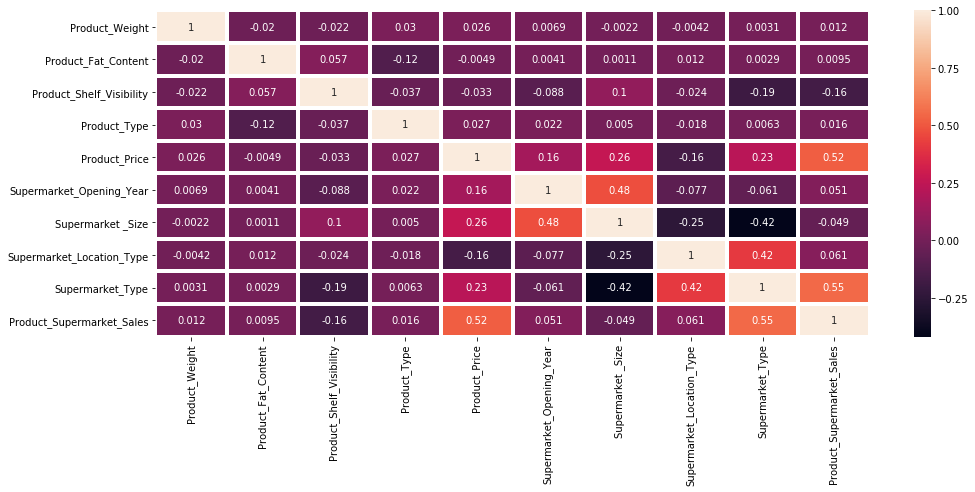

In [25]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), annot=True, linewidths=3.0)

In [26]:
df["price_size"] = df["Product_Price"] * df["Supermarket _Size"]
df["size_type"] = df["Supermarket _Size"] * df["Supermarket_Location_Type"]
df["size_year"] = df["Supermarket _Size"] * df["Supermarket_Opening_Year"]
df["price_type"] = df["Product_Price"] * df["Supermarket_Type"]
df["price_year"] = df["Product_Price"] * df["Supermarket_Opening_Year"]
df["price_location"] = df["Product_Price"] * df["Supermarket_Location_Type"]
df["visibility_type"] = df["Supermarket_Type"] * df["Product_Shelf_Visibility"]
df["visibility_size"] = df["Product_Shelf_Visibility"] * df["Supermarket _Size"]
df["type_location"] = df["Supermarket_Location_Type"] * df["Supermarket_Type"]

df["inflation"] = df["price_year"] - df["Product_Price"]

df["price_sie"] = df["Product_Price"] * df["Supermarket_Location_Type"]
df["size_tye"] = df["Supermarket _Size"] * df["Product_Price"]

df["visibility_sie"] = df["Supermarket_Location_Type"] * df["Supermarket _Size"]
df["type_locaton"] = df["Product_Shelf_Visibility"] * df["Supermarket_Type"]

In [27]:
test["price_size"] = test["Product_Price"] * test["Supermarket _Size"]
test["size_type"] = test["Supermarket _Size"] * test["Supermarket_Location_Type"]
test["size_year"] = test["Supermarket _Size"] * test["Supermarket_Opening_Year"]
test["price_type"] = test["Product_Price"] * test["Supermarket_Type"]
test["price_year"] = test["Product_Price"] * test["Supermarket_Opening_Year"]
test["price_location"] = test["Product_Price"] * test["Supermarket_Location_Type"]
test["visibility_type"] = test["Supermarket_Type"] * test["Product_Shelf_Visibility"]
test["visibility_size"] = test["Product_Shelf_Visibility"] * test["Supermarket _Size"]
test["type_location"] = test["Supermarket_Location_Type"] * test["Supermarket_Type"]

test["inflation"] = test["price_year"] - test["Product_Price"]

test["price_sie"] = test["Product_Price"] * test["Supermarket_Location_Type"]
test["size_tye"] = test["Supermarket _Size"] * test["Product_Price"]

test["visibility_sie"] = test["Supermarket_Location_Type"] * test["Supermarket _Size"]
test["type_locaton"] = test["Product_Shelf_Visibility"] * test["Supermarket_Type"]

In [28]:
df.corr()['Product_Supermarket_Sales'].sort_values(ascending=False).head(12)

Product_Supermarket_Sales    1.000000
price_type                   0.658679
Supermarket_Type             0.554920
Product_Price                0.518285
price_year                   0.517792
inflation                    0.517792
type_location                0.405114
price_sie                    0.360091
price_location               0.360091
type_locaton                 0.316299
visibility_type              0.316299
size_tye                     0.175719
Name: Product_Supermarket_Sales, dtype: float64

In [ ]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), annot=True, linewidths=3.0)

In [ ]:
col = df[['Product_Identifier','Supermarket_Identifier','Product_Supermarket_Identifier']]
df.drop(col, axis = True, inplace=True)
df.head()

In [ ]:
col = test[['Product_Identifier','Supermarket_Identifier','Product_Supermarket_Identifier']]
test.drop(col, axis = True, inplace=True)
test.head()

In [ ]:
df.columns

### Selection of the Independent(X) and dependent(y) variables

In [ ]:
X = df[['Product_Weight', 'Product_Fat_Content', 'Product_Shelf_Visibility',
       'Product_Type', 'Product_Price', 'Supermarket_Opening_Year',
       'Supermarket _Size', 'Supermarket_Location_Type', 'Supermarket_Type',
              'price_size', 'size_type', 'size_year',
       'price_type', 'price_year', 'price_location', 'visibility_type',
       'visibility_size', 'type_location', 'inflation', 'price_sie',
       'size_tye', 'visibility_sie', 'type_locaton']]
new_data = test[['Product_Weight', 'Product_Fat_Content', 'Product_Shelf_Visibility',
       'Product_Type', 'Product_Price', 'Supermarket_Opening_Year',
       'Supermarket _Size', 'Supermarket_Location_Type', 'Supermarket_Type',
              'price_size', 'size_type', 'size_year',
       'price_type', 'price_year', 'price_location', 'visibility_type',
       'visibility_size', 'type_location', 'inflation', 'price_sie',
       'size_tye', 'visibility_sie', 'type_locaton']]

y =  df['Product_Supermarket_Sales']

### Here is Where the Cross Validation Takes place

In [ ]:
from sklearn.cross_validation import train_test_split 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Model

####  Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)

#### the intercept

In [ ]:
lr.intercept_

#### the coeficient

In [ ]:
lr.coef_

#### the score

In [ ]:
lr.score(X_test, y_test)

#### the predictions

In [ ]:
pred_X_test = lr.predict(X_test)

In [ ]:
pred_X_test

In [ ]:
pred_test = lr.predict(new_data)
pred_test

## Output

In [ ]:
a = pd.DataFrame()
a['Product_Supermarket_Identifier'] = ID
a['Product_Supermarket_Sales'] = pred_X_test
a.to_csv('output/Ouput_1.csv', index=False)
a.head()

In [ ]:
b = pd.DataFrame()
b['Product_Supermarket_Identifier'] = ID
b['Product_Supermarket_Sales'] = pred_test
b.to_csv('output/Ouput_1.csv', index=False)
b.head()